# T√¢che 5

Etudier l‚Äôeffet de 3 √©l√©ments de sym√©trie diff√©rents (pas l‚Äôidentit√©) chacun pour 1 atome diff√©rent.

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from plotly.subplots import make_subplots
from pymatgen.io.cif import CifWriter
import plotly.graph_objects as go
from IPython.display import Image

In [2]:
mp_key = "xaEW7gxeGjtHSTeJuWSz9Uf8JpzNlgtg"
mp_id = "mp-9382"

In [3]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
struct = SpacegroupAnalyzer(structure)
conv_struc = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Op√©ration de sym√©trie 1

In [4]:
i_atom = 6 #7
i_symmop = 10 #2

In [5]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [6]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print(pos_init)

[1.  1.  0.5]


In [7]:
pos_final = symmop.operate(pos_init)
print(pos_final)

[1.11022302e-16 1.00000000e+00 5.00000000e-01]


La matrice de rotation correspond √† un op√©rateur d'inversion ( op√©ration de deuxi√®me esp√®ce). Chaque coordonn√©e (x, y, z) est transform√©e en (-x, -y, -z). Le vecteur de translation tau est nul ce qui signifie qu'il n'y a pas de translation suppl√©mentaire.

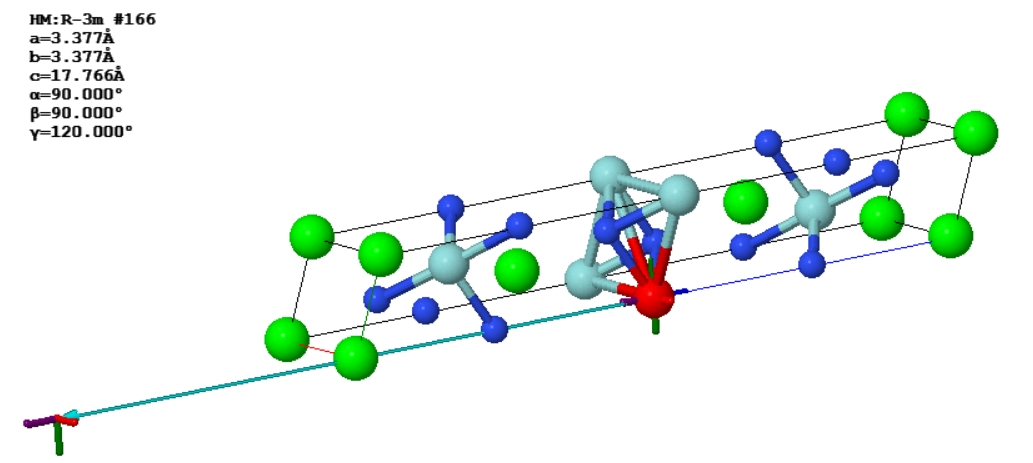

In [8]:
display(Image(filename="Op1.png"))

# Op√©ration de sym√©trie 2

In [9]:
i_atom = 2
i_symmop = 7

In [10]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]


In [11]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print(pos_init)

[0.66666667 0.33333333 0.33333333]


In [12]:
pos_final = symmop.operate(pos_init)
print(pos_final)

[ 0.33333333  0.66666667 -0.33333333]


La matrice de rotation correspond √† une rotation d'ordre 4 autour de l'axe z, suivie d'une r√©flexion par rapport au plan xy. Chaque coordonn√©e (x,y,z) devient (y, x, -z). Le vecteur de translation tau est nul ce qui signifie qu'il n'y a pas de translation suppl√©mentaire. Sur la figure nous pouvons observer le plan miroir suivant lequel la r√©flexion s'effectue.

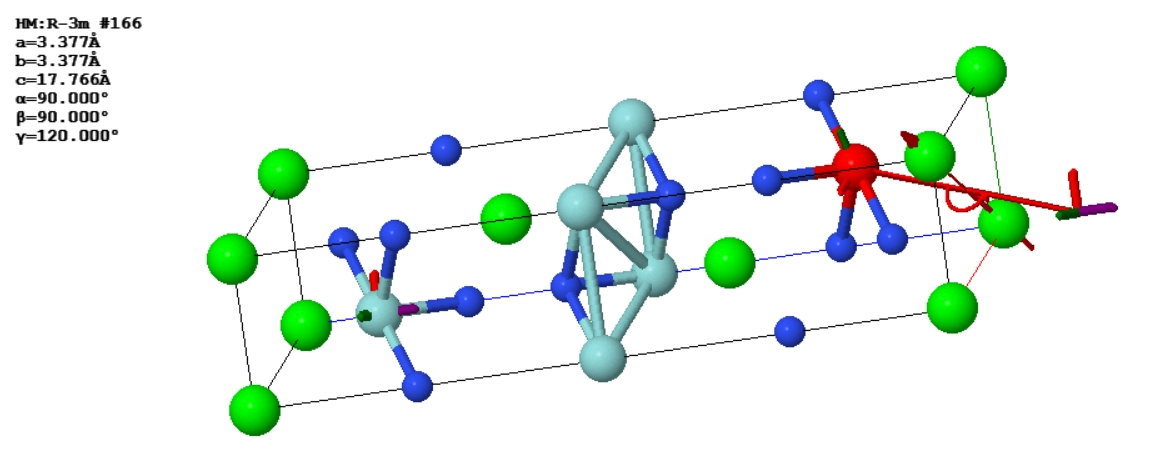

In [13]:
display(Image(filename="Op2.png"))

# Op√©ration de sym√©trie 3

In [14]:
i_atom = 6
i_symmop = 10

In [15]:
symmop = symmops[i_symmop - 1]
print(symmop)

Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]


In [16]:
pos_init = conv_struc.sites[i_atom -1].frac_coords
print(pos_init)

[1.  1.  0.5]


In [17]:
pos_final = symmop.operate(pos_init)
print(pos_final)

[1.11022302e-16 1.00000000e+00 5.00000000e-01]


En analysant la matrice de rotation, nous observons que les coordonn√©es y et z restent inchang√©es, alors que la coordonn√©e x est transform√©e en une combinaison lin√©aire de x et y, selon la relation  x'= ‚àíùë• + ùë¶ . Cette transformation indique une r√©flexion suivie d'une translation dans le plan xy. Le vecteur translation tau est nul, cela signifie qu‚Äôaucune translation globale n‚Äôest appliqu√©e apr√®s la rotation. Sur la figure nous pouvons observer le plan miroir suivant lequel la r√©flexion s'effectue.

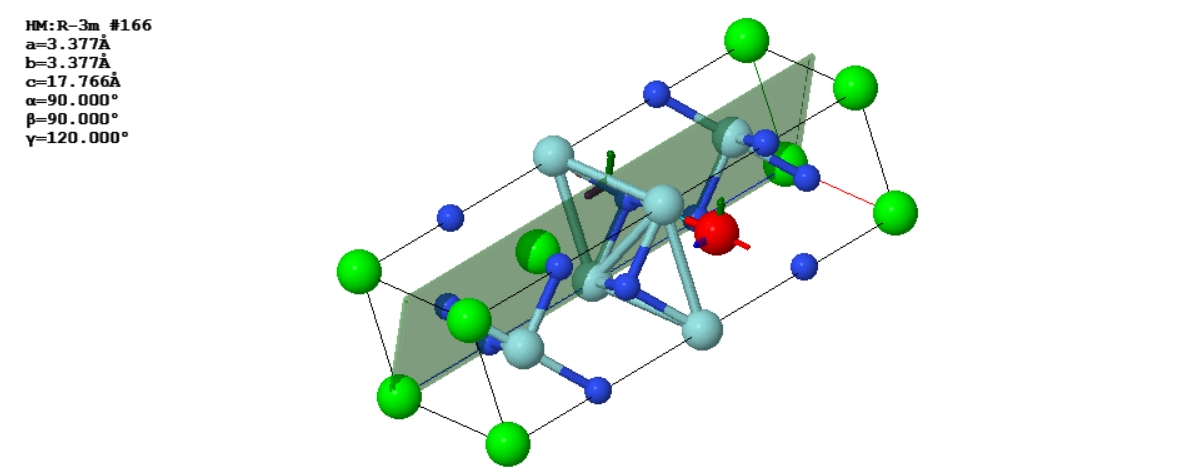

In [18]:
display(Image(filename="Op3.png"))